## Attention Mechanisms

![Attention](https://camo.githubusercontent.com/966b15715dd8d9cf0c1eda75a5e84c06f172e505e2ad745871c97b2af0abecd3/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30312e776562703f313233)

**problem with modeling long sequences**

Translating a text word by word isn't feasible due to the differences in grammatical structures between the source and target languages:

![longsequence](https://camo.githubusercontent.com/587a53eb536a33f5031d8831d03f3f3f4c2bd933598eb1904ee3e216bfb0bf5f/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30332e77656270)

Prior to the introduction of transformer models, encoder-decoder RNNs/LSTMs were commonly used for machine translation tasks.

The Problem with RNNs and LSTMs/GRU

- **Sequential bottleneck**: RNNs/LSTMs read one token at a time → slow, hard to parallelize.  

- **Long-term dependencies**: LSTM retain information over longer sequences than RNN. Howerver, both LSTMs & RNNs compress all past information into a single hidden vector. A single vector was unable to store all nuances leading to information loss about distant or multiple relevant tokens.

In this setup, the encoder processes a sequence of tokens from the source language, using a hidden state—a kind of intermediate layer within the neural network—to generate a condensed representation of the entire input sequence:

![withRNN](https://camo.githubusercontent.com/b746f4740775b108aed671fec26f699e38417227be44919588650627114c83fe/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30342e77656270)

This led to the paper called **Bahdanau Attention Mechanism** in 2014. It brought in the followings:

- Using an attention mechanism, the text generating decoder part of the network can access all input tokens **selectively**. 

- This means that some input tokens are more important than others for generating a given output token.

- This importance is determined by the so called **attention weights**

![attention](https://camo.githubusercontent.com/58ba95b2fa66f0d4b0ce833c0accb2c740f37bb7ec55277e0eb8bac6c8de90d6/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30352e77656270)

Only 3 years later in 2017, the researchers found that **RNN/LSTM** architecutures are not required for building deep neural networks for natural language processing and proposed the original **Transformer** architecture with a **self-attention** mechanism inspired by **Bahdanau Attention Mechanism**. 

### Self-Attention
- Self-attention in transformers is a technique designed to enhance input representations by enabling each position in a sequence to engage with and determine the relevance of every other position within the same sequence. (Each token find out how related they are w.r.t. other tokens in the sequence)

- Self-attention is a key component of the contemporary LLMs based on the transformer architecture such as GPT series.

![self-attention](https://camo.githubusercontent.com/b6dc08b623473de3b2c3afc9ff3fc553fa970dc16af7c4793b1a812295572328/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30362e77656270)

- In Self-attention, the self refers to the mechanism's ability to compute attention weights by relating different position in a single input sequence.

- It learns the relationship between various pats of the input itself, such as words in a sentence.

### Vector Embedding
Here is an example where the vectors are represented in a 3D vector space. 

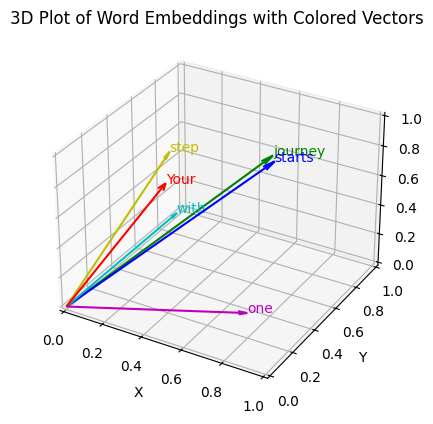

In the vector space, you find the importance of one vector w.r.t. another vector using "dot product between the vectors".

- If 2 vectors are alligned close to each other incase of strong simillarity, cosine of angle will be 1. So the 2 vector maginitude multiplication will be the maximum.

- If angle is 90 degree, the cosine is 0, and so also the multiplication. It means, the 2 vector has no dependencies. 

- Hence, the dot product tells you how allign the vectors are. It is used find the relationship between the vectors in the self attention.


![dotproduct](https://www.sciencing.com/sciencing/dot-product-vector-definition-formula-how-to-find-w-diagrams-examples-13720224/6601bde0daaa4a988117d444799e8fa9.png.jpg)

## Attention Mechanism Evolution

![attention](https://camo.githubusercontent.com/21a35b816a72c5888beefebe03c3dd3968186d027005ce1def7a8b54f7d5cdb0/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30322e77656270)

## 1. Simplified Self Attention Mechanism (No trainable weights)

Example Input: "your journey starts with one step"

- Embedding creates multi-dimensional vector representation of the word that captures the meaning of the word. Say, x1, x2, x3 are the d-dimensional vector representations of the words "your", "journey", "starts", and so forth.

- It does not capture how one word is related to another. The relation is indeed needed for the LLM to predict the next word. The relationship capture is called contextual embedding.

- In the context of self attension mechanisms, "dot product" determines the extend to which elements of a sequence attend to one another. Higher the dot product, higher is the simillarity and attention score or weight.

- In the example below, x2 is the query vector for which we have to find the importance of other vectors. $\alpha21$ is the attention weight of x1 on x2, $\alpha22$ is the attention weight of x2 on x2, so on and so forth.

- z2 is contextual vector to x2, which is combination of all input vector attention weights. 



![contextualembedding](https://camo.githubusercontent.com/a376d0ab837f4c984e84b70e41a7baccc87f9329b93bd5561e12d14e8f496027/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30372e77656270)

In [2]:
# A sample code to calculate the attention weights
import torch
import matplotlib.pyplot as plt

# Your input tensor
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x¹)
   [0.55, 0.87, 0.66], # journey  (x²)
   [0.57, 0.85, 0.64], # starts   (x³)
   [0.22, 0.58, 0.33], # with     (x⁴)
   [0.77, 0.25, 0.10], # one      (x⁵)
   [0.05, 0.80, 0.55]] # step     (x⁶)
)



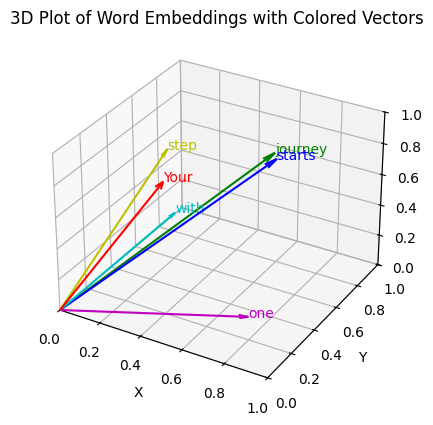

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# # Create 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot each point and annotate with corresponding word
# for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
#     ax.scatter(x, y, z)
#     ax.text(x, y, z, word, fontsize=10)

# # Set labels for axes
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.title('3D Plot of Word Embeddings')
# # plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

**Step1** 

compute unnormalized attention scores 

![](https://camo.githubusercontent.com/28adcd6251e4284c42650e66c8052aa666e0d7f5e78dbc79bf82033ffee397a4/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30382e77656270)

In [4]:
query = inputs[1]  # Query vector for "journey" (x^2)

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print("Unormalized attention scores for 'journey' w.r.t all other vectors in the sequence:")
print("[w21, w22, w23, w24, w25, w26] = ")
print(attn_scores_2)

Unormalized attention scores for 'journey' w.r.t all other vectors in the sequence:
[w21, w22, w23, w24, w25, w26] = 
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


**Step2** 

normalize the unnormalized attention scores so that they sum up to 1

![](https://camo.githubusercontent.com/4e9a4373bc397a2f6930193b112516391165cb6b18107cf2883aeb58ae2788f6/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f30392e77656270)

In [5]:
# normalize the attention scores
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("\nNormalized attention weights for 'journey' w.r.t all other vectors in the sequence:")
print("[alpha21, alpha22, alpha23, alpha24, alpha25, alpha26] = ")
print(attn_weights_2)




Normalized attention weights for 'journey' w.r.t all other vectors in the sequence:
[alpha21, alpha22, alpha23, alpha24, alpha25, alpha26] = 
tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


**Step 3:** 

compute the context vector z2 (for x2) by multiplying the embedded input tokens x1...x6, with the attention weights (alpha21...alpha26) and sum the resulting vectors:

![](https://camo.githubusercontent.com/2dd2ab3102d082849046ad18395d5ceb526d479dc490d4eb5cb159ad347f467d/68747470733a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f4c4c4d732d66726f6d2d736372617463682d696d616765732f636830335f636f6d707265737365642f31302e77656270)

In [6]:
query = inputs[1] # Query vector for "journey" (x^2)

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


**Computing Attention Weights for All Input Tokens in the Sequence**

In above Step1-3, we show how to calculate the contextual vector for the query x2. Here, we will calculate for the entire sequence x1...x6.

In [7]:
attn_scores = torch.empty(6, 6)

# Step1: compute unnormalized attention scores for all input tokens
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

# Step2: normalize the attention scores for all input tokens
attn_weights = torch.empty(6, 6)
for i in range(attn_scores.shape[0]):
    attn_weights[i] = torch.softmax(attn_scores[i], dim=0)  
print(attn_weights)

# Step3: compute context vectors for all input tokens
print("\n"  )
print("Normalized Contextual Vector for the Sequence:")
context_vectors = torch.empty_like(inputs)
for i, query in enumerate(inputs):
    context_vec = torch.zeros(query.shape)
    for j, x_j in enumerate(inputs):
        context_vec += attn_weights[i, j] * x_j
    context_vectors[i] = context_vec   
print(context_vectors) 

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


Normalized Contextual Vector for the Sequence:
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## 2. Self Attention Mechanism (with trainable weights)
To compute attention, we can start with the **dot product of vectors**, which measures similarity between words. Words that are semantically similar tend to get higher attention scores.  

### Examples

- **Synonyms / Semantic similarity:**  
  - "journey", "trip", and "travel" are synonymous and have high semantic similarity.  
  - "starts" and "begin" are synonymous verbs.  

- **Grammatical / Contextual relationship:**  
  - "journey" ↔ "starts" reflects a contextual relationship: “a journey is what starts.”  
  - Such relationships **cannot be captured by simple dot-product similarity alone**—they require **trainable weights** to learn the contextual importance of words.

You may argue that why I used the "Journey Starts" example in the above example of without trainable weights. That was primarily to show you how contextual vector is created. But it would not reflect the actual context.

In [8]:
# Your input tensor 6x3 for learning purposes
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x¹)
   [0.55, 0.87, 0.66], # journey  (x²)
   [0.57, 0.85, 0.64], # starts   (x³)
   [0.22, 0.58, 0.33], # with     (x⁴)
   [0.77, 0.25, 0.10], # one      (x⁵)
   [0.05, 0.80, 0.55]] # step     (x⁶)
)

**Step1:** Build Q, K and V matrices

At the heart of the trainable weights are 3 main matrices: Query (Q), Key (K) and Value (V).

- Query (Q): Analogous to search query in a database. It represents the current token the model focuses on.

- Key (K): Each item in input sequence has key. Keys are used to match with query.

- Value (V): It represents the actual content or representation of the input items. Once the model determines which keys are most relevant to the query, it retrieves the corresponding values.

In this **Self Attention Mechanism**, the Input tensor/matrix is converted into 3 different matrices Q, K and V. And this is achieved by multiply the input matrix with **trainable weight matrix** $W_q$, $W_k$, $W_v$.

To start with the training process, you start with random values in these $W_q$, $W_k$, $W_v$ metrixes. 



In [17]:
import torch
import torch.nn as nn

# d_in = dimension of each input vector
d_in = inputs.shape[1]      # Input dimension (6 x 3) where 6 is the length of the sequence and 3 is the dimension of each input vector 
                            # In gpt-2, the length of the sequence is 1024 and the dimension of each input vector is 768.

# d_out = dimension of output layer. We have taken 2 for simplicity.
d_out = 2                   # Dimension of Query and Key vectors. 

torch.manual_seed(123) # Set seed for reproducibility

# Note: you start with random values in these weight matrices. These will be learned and updated during training.
W_q = nn.Parameter(torch.randn(d_in, d_out)) # Trainable weight matrix for Query of shape (3 x 2)
W_k = nn.Parameter(torch.randn(d_in, d_out)) # Trainable weight matrix for Key of shape (3 x 2)
W_v = nn.Parameter(torch.randn(d_in, d_out)) # Trainable weight matrix for Value of shape (3 x 2)

print("Query Weights:\n", W_q)

Query Weights:
 Parameter containing:
tensor([[-0.1115,  0.1204],
        [-0.3696, -0.2404],
        [-1.1969,  0.2093]], requires_grad=True)


In [19]:
# Multiply 6 x 3 matrix with 3 x 2 matrix to get 6 x 2 matrix
# The row vectors in the resulting matrices represent the Query, Key and Value vectors for each input token

Queries = inputs @ W_q   # Query matrix of shape (6 x 2)
Keys = inputs @ W_k   # Key matrix of shape (6 x 2)
Values = inputs @ W_v   # Value matrix of shape (6 x 2)  
print("Query Matrix:\n", Queries)
print("Key Matrix:\n", Keys)
print("Value Matrix:\n", Values)
print("\n")
print("Transpose of Key Matrix:\n", Keys.T)

Query Matrix:
 tensor([[-1.1686,  0.2019],
        [-1.1729, -0.0048],
        [-1.1438, -0.0018],
        [-0.6339, -0.0439],
        [-0.2979,  0.0535],
        [-0.9596, -0.0712]], grad_fn=<MmBackward0>)
Key Matrix:
 tensor([[-0.1823, -0.6888],
        [-0.1142, -0.7676],
        [-0.1443, -0.7728],
        [ 0.0434, -0.3580],
        [-0.6467, -0.6476],
        [ 0.3262, -0.3395]], grad_fn=<MmBackward0>)
Value Matrix:
 tensor([[ 0.1196, -0.3566],
        [ 0.4107,  0.6274],
        [ 0.4091,  0.6390],
        [ 0.2436,  0.4182],
        [ 0.2653,  0.6668],
        [ 0.2728,  0.3242]], grad_fn=<MmBackward0>)


Transpose of Key Matrix:
 tensor([[-0.1823, -0.1142, -0.1443,  0.0434, -0.6467,  0.3262],
        [-0.6888, -0.7676, -0.7728, -0.3580, -0.6476, -0.3395]],
       grad_fn=<PermuteBackward0>)


**Step2:** Calculate Attention Score and Weights

The Query 2-dimensional vector from above looks like below (6 x 2)

| Token     |    W_qi  |  W_qi2   |
|-----------|----------|----------|
| your      | -1.1686  |  0.2019  |
| journey   | -1.1729  | -0.0048  |
| starts    | -1.1438  | -0.0018  |
| with      | -0.6339  | -0.0439  |
| one       | -0.2979  |  0.0535  |
| step      | -0.9596  | -0.0712  |

The Key Matrix transpose look like below (2 x 6):

|        | your    | journey | starts  | with    | one     | step    |
|--------|---------|---------|---------|---------|---------|---------|
| W_kj  | -0.1823 | -0.1142 | -0.1443 |  0.0434 | -0.6467 |  0.3262 |
| W_kj  | -0.6888 | -0.7676 | -0.7728 | -0.3580 | -0.6476 | -0.3395 |

**Unnormalized Attention Score**: 6 x 6 matrix

The attention **score** between query *i* and key *j* is given by:

$
\text{score}_{i,j} = \mathbf{q}_i \cdot \mathbf{k}_j = \sum_{d=1}^{D} q_{i,d} \, k_{j,d}
$

| Query\Key | your    | journey | starts  | with    | one     | step    |
|-----------|---------|---------|---------|---------|---------|---------|
| your      |  0.0740 | -0.0215 |  0.0126 | -0.1230 |  0.6250 | -0.4497 |
| journey   |  0.2171 |  0.1376 |  0.1730 | -0.0492 |  0.7616 | -0.3810 |
| starts    |  0.2098 |  0.1320 |  0.1664 | -0.0490 |  0.7409 | -0.3725 |
| with      |  0.1458 |  0.1061 |  0.1254 | -0.0118 |  0.4384 | -0.1919 |
| one       |  0.0175 | -0.0070 |  0.0016 | -0.0321 |  0.1580 | -0.1153 |
| step      |  0.2240 |  0.1642 |  0.1935 | -0.0162 |  0.6667 | -0.2888 |


**Scaled Scores**:

| Query\Key | your    | journey | starts  | with    | one     | step    |
|-----------|---------|---------|---------|---------|---------|---------|
| your      |  0.0523 | -0.0152 |  0.0089 | -0.0870 |  0.4419 | -0.3180 |
| journey   |  0.1535 |  0.0973 |  0.1223 | -0.0348 |  0.5385 | -0.2694 |
| starts    |  0.1483 |  0.0933 |  0.1177 | -0.0346 |  0.5239 | -0.2634 |
| with      |  0.1031 |  0.0750 |  0.0887 | -0.0083 |  0.3100 | -0.1357 |
| one       |  0.0123 | -0.0050 |  0.0012 | -0.0227 |  0.1117 | -0.0816 |
| step      |  0.1584 |  0.1161 |  0.1368 | -0.0114 |  0.4714 | -0.2042 |


In [11]:
# Calculate Attention Score
attention_score = Queries @ Keys.T
print("Attention Scores:\n", attention_score)

# Normalize Attention Scores using Softmax
attention_weights = torch.softmax(attention_score / Keys.shape[-1]**0.5, dim=-1)
print("Attention Weights:\n", attention_weights)

Attention Scores:
 tensor([[-1.7791, -1.2258, -1.2745, -0.3476, -1.7945,  0.0634],
        [-1.2821, -0.8803, -0.9155, -0.2484, -1.2925,  0.0487],
        [-1.2567, -0.8496, -0.8844, -0.2341, -1.2640,  0.0610],
        [-0.5943, -0.4456, -0.4609, -0.1415, -0.6076, -0.0144],
        [-0.4480, -0.0573, -0.0762,  0.0894, -0.3956,  0.2642],
        [-0.8927, -0.7782, -0.7983, -0.2892, -0.9369, -0.1292]],
       grad_fn=<MmBackward0>)
Attention Weights:
 tensor([[0.0883, 0.1305, 0.1261, 0.2429, 0.0873, 0.3248],
        [0.1080, 0.1435, 0.1400, 0.2244, 0.1072, 0.2768],
        [0.1083, 0.1445, 0.1410, 0.2233, 0.1078, 0.2751],
        [0.1411, 0.1568, 0.1551, 0.1944, 0.1398, 0.2127],
        [0.1286, 0.1696, 0.1673, 0.1881, 0.1335, 0.2129],
        [0.1357, 0.1471, 0.1450, 0.2079, 0.1315, 0.2328]],
       grad_fn=<SoftmaxBackward0>)


In [12]:
# Calculate Context Vectors 
context_vectors = attention_weights @ Values # Context Vectors of shape (6 x 2)
print("Context Vectors:\n", context_vectors)

Context Vectors:
 tensor([[ 0.0741,  0.5293],
        [ 0.0131,  0.5213],
        [ 0.0111,  0.5215],
        [-0.0772,  0.5050],
        [-0.0686,  0.5181],
        [-0.0514,  0.5047]], grad_fn=<MmBackward0>)
